In [217]:
import time
import numpy as np 
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from time import sleep

In [218]:
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))  #(low,high,size), 包含low, 不包含high
    inputs = []
    labels = []
    for pt in pts :
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1])/1.414
        if(pt[0] > pt[1]):
            labels.append(0)
        else: 
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy():
    inputs = []
    labels = []
    
    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        
        if 0.1*i == 0.5:
            continue
        inputs.append([0.1*i, (1 - 0.1*i)])
        labels.append(1)
    return np.array(inputs), np.array(labels).reshape(21, 1)

def data_type_define(d_type):
    if d_type == 'linear':
        x, y = generate_linear()
        return x, y
    elif d_type == 'XOR':
        x, y = generate_XOR_easy()
        return x, y
    else :
        x, y = generate_XOR_easy()
        return x, y
    
def show_result(x, y, pred_y):
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title('Ground truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0],x[i][1],'ro')
        else :
            plt.plot(x[i][0],x[i][1],'bo')
            
    plt.subplot(1,2,2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0],x[i][1],'ro')
        else :
            plt.plot(x[i][0],x[i][1],'bo')
    
    plt.show()

### NN network

In [226]:
class Neural_Network(object):
    def __init__(self):
    #parameters
        self.learning_rate = 0.0015
        self.inputSize  = 2
        self.hiddenSize = 20
        self.outputSize = 1
        
    #weights
        self.W1 = np.random.randn(self.inputSize,  self.hiddenSize) 
        self.W2 = np.random.randn(self.hiddenSize, self.hiddenSize)
        self.W3 = np.random.randn(self.hiddenSize, self.outputSize) 
    
    def activation_func_type(self, x, deri_trig):
        if (deri_trig == 0):
            return 1.0/(1.0 + np.exp(-x))    #sigmoid
        elif (deri_trig == 1):
            return np.multiply(x, 1.0 - x)   #derivative_sigmoid
        elif (deri_trig == 2):
            return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)) #tanh 
        elif (deri_trig == 3):
            return 1-x**2                    #derivative_tanh
        elif (deri_trig == 4):
            return np.maximum(0, x)
#             return np.maximum(0, x)           #Relu
        elif (deri_trig == 5):
            return (x > 0).astype(float)
#             return 1.0*(x>0)                #derivative_Relu
        elif (deri_trig == 6):
            return np.maximum(0.01 * x, x)  #leaky_relu
        elif (deri_trig == 7):              #derivative_leaky_relu
            return np.clip(x > 0, 0.01, 1.0)  
        else :
            return x                         #default 
    
    #forward propagation
    def forward(self, X):
        self.multi_1st  = np.dot(X, self.W1) 
        self.Z1 = self.activation_func_type(self.multi_1st, 0)
        
        self.multi_2nd = np.dot(self.Z1, self.W2)
        self.Z2 = self.activation_func_type(self.multi_2nd, 0)
        
        self.multi_3rd = np.dot(self.Z2, self.W3)
        o_pred = self.activation_func_type(self.multi_3rd, 0)
        return o_pred
    
    # backward propagation
    def backward(self, X, y, o):
#         self.loss = y - o
        self.loss = o - y
        self.o_delta = self.loss*self.activation_func_type(o, 1)

        self.z2_error = self.o_delta.dot(self.W3.T) 
        self.z2_delta = self.z2_error*self.activation_func_type(self.Z2, 1) 
        
        self.z1_error = self.z2_delta.dot(self.W2.T) 
        self.z1_delta = self.z1_error*self.activation_func_type(self.Z1, 1)

        #update eights
#         self.W1 += X.T.dot(self.z1_delta) * self.learning_rate
#         self.W2 += self.Z1.T.dot(self.z2_delta) * self.learning_rate
#         self.W3 += self.Z2.T.dot(self.o_delta) * self.learning_rate
        self.W1 = self.W1 - X.T.dot(self.z1_delta) * self.learning_rate
        self.W2 = self.W2 - self.Z1.T.dot(self.z2_delta) * self.learning_rate
        self.W3 = self.W3 - self.Z2.T.dot(self.o_delta) * self.learning_rate
        
        
    def train_flow(self, X, y):
        o = self.forward(X)
        self.backward(X, y, o) 
        
    def train_epoch(self, epoch, num_show, x, y):
        loss = np.zeros(int(epoch/num_show))
        
        for i in range(epoch + 1):
            self.train_flow(x, y)
            if(i==0)or((i%num_show == 0)and(i > 9999)):
                loss[i%num_show] = np.mean(np.square(y - self.forward(x))) #MSE(mean sum squared) loss
                print ("epoch " + str(i) + " Loss: " + str(loss[i%num_show]))
        return loss

    def plot_loss(self, loss, x , y):
        plt.title('Loss' , fontsize = 18)
        plt.plot(loss)
        
        pred_y = self.forward(x)
#         print("**-----Preduction Result-----**")
#         if(len(pred_y)==100):
#             print(np.reshape(pred_y, (len(pred_y)//5, 5), order='F'))
#         else:
#             print(pred_y)
#         print("**-------------------------------**" )
        self.classify_correct(pred_y, y)
        
        plt.xlabel("# of epoch (*" + str(num_to_show) + ")")
        plt.show()
        
        return pred_y
    
    
    #predict y v.s label 
    def classify_correct(self, pred_y, label_y):
        correct_num = 0
        fail_pos = []
        print("**-----start to classify...-----**" )
        for i in tqdm(range(len(pred_y))):
            if(pred_y[i] > 0.5):
                pred_y[i] = 1
            else:
                pred_y[i] = 0
        
            if(pred_y[i] == label_y[i]):
                correct_num = correct_num + 1
            else:
                correct_num = correct_num
                fail_pos.append(i)
            sleep(0.01)
        print("**-----Classification Result-----**" )
        print("PASS : {} || FAIL： {} ".format(correct_num, len(pred_y)-correct_num) )
        if (len(pred_y)-correct_num)==0:
            print("FAIL position : NONE")
        else:
            print("FAIL position : {}".format(fail_pos))
        print("Accuracy : ", correct_num/len(pred_y))      
        print("**-------------------------------**" )

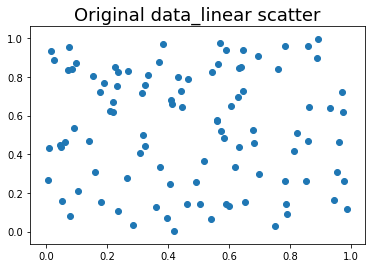

start training
epoch 0 Loss: 0.2698731616750497
epoch 10000 Loss: 0.011824984396541742
epoch 15000 Loss: 0.009461834765964907
epoch 20000 Loss: 0.007957895763788338
epoch 25000 Loss: 0.006839723798375855
epoch 30000 Loss: 0.0059480442976039315
epoch 35000 Loss: 0.005212516637428447
epoch 40000 Loss: 0.004595297317241454
epoch 45000 Loss: 0.004072461127402613
epoch 50000 Loss: 0.0036269304404926606
epoch 55000 Loss: 0.003245537834047626
epoch 60000 Loss: 0.002917700159564749
epoch 65000 Loss: 0.0026347448267197747
epoch 70000 Loss: 0.0023895085126206315
epoch 75000 Loss: 0.002176057756342987
epoch 80000 Loss: 0.001989472548340734
epoch 85000 Loss: 0.0018256697683189773
epoch 90000 Loss: 0.0016812565982068312
epoch 95000 Loss: 0.0015534086535594703
epoch 100000 Loss: 0.0014397691026253499
Excution time：19.567658 sec
**-----start to classify...-----**



**-----Classification Result-----**
PASS : 100 || FAIL： 0 
FAIL position : NONE
Accuracy :  1.0
**-------------------------------**


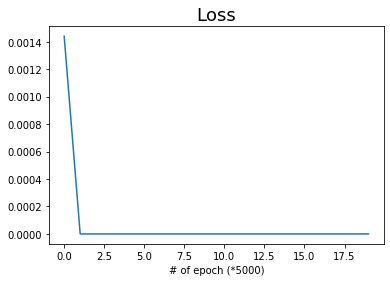

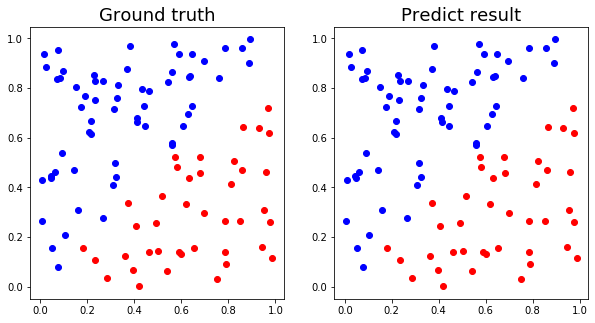

In [227]:
NN = Neural_Network()
epoch = 100000
num_to_show = 5000

#data generate in "linear" type
x_lin, y_lin = data_type_define('linear')
plt.title('Original data_linear scatter' , fontsize = 18)
plt.scatter(x_lin[:,0], x_lin[:,1]) 
plt.show() 

print("start training" )
start = time.time()
#show loss in  every 5000 epoch
loss_val = NN.train_epoch(epoch, num_to_show, x_lin, y_lin)

end = time.time()
print("Excution time：%f sec" % (end - start))

pred_y = NN.plot_loss(loss_val, x_lin, y_lin)
#show ground truth v.s predict rusult
show_result(x_lin, y_lin, pred_y)

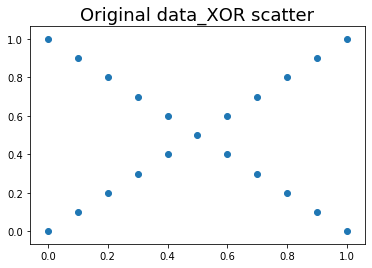

start training
epoch 0 Loss: 0.5031819490349951
epoch 10000 Loss: 0.18776378693653117
epoch 15000 Loss: 0.12305727990869822
epoch 20000 Loss: 0.08503109343240764
epoch 25000 Loss: 0.06357035088127404
epoch 30000 Loss: 0.049512227758476586
epoch 35000 Loss: 0.038829050267450704
epoch 40000 Loss: 0.030166901356611476
epoch 45000 Loss: 0.023233648667455566
epoch 50000 Loss: 0.017901815209683973
epoch 55000 Loss: 0.013933266080642189
epoch 60000 Loss: 0.011022426585043868
epoch 65000 Loss: 0.008885297151652576
epoch 70000 Loss: 0.007299066623121906
epoch 75000 Loss: 0.00610288662729241
epoch 80000 Loss: 0.00518473319741962
epoch 85000 Loss: 0.0044673683187572135
epoch 90000 Loss: 0.0038973381610935354
epoch 95000 Loss: 0.0034372448227663298
epoch 100000 Loss: 0.003060547876039777
Excution time：8.697090 sec
**-----start to classify...-----**



**-----Classification Result-----**
PASS : 21 || FAIL： 0 
FAIL position : NONE
Accuracy :  1.0
**-------------------------------**


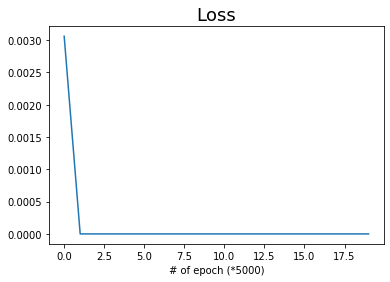

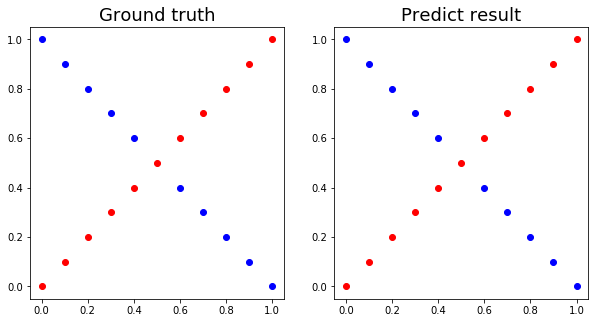

In [228]:
NN = Neural_Network()
epoch = 100000
num_to_show = 5000

#data generate in "XOR" type
x_XOR, y_XOR = data_type_define('XOR')
plt.title('Original data_XOR scatter' , fontsize = 18)
plt.scatter(x_XOR[:,0], x_XOR[:,1]) 
plt.show() 

print("start training" )
start = time.time()
#show loss in  every 5000 epoch
loss_val = NN.train_epoch(epoch, num_to_show, x_XOR, y_XOR)
end = time.time()
print("Excution time：%f sec" % (end - start))

pred_y = NN.plot_loss(loss_val, x_XOR, y_XOR)

#show ground truth v.s predict rusult
show_result(x_XOR, y_XOR, pred_y)